# Diabetic Patient Prediction

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
X = df.drop('Outcome',axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [5]:
y = df.Outcome
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [6]:
list1 = []
list2 = []

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

## Solving using Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [9]:
ans = model.score(X_test,y_test)
list1.append('Logistic Regression')
list2.append(ans)
ans

0.8506493506493507

#### Accuracy using Logistic Regression is 85%

## Solving using Decision Tree

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
model = DecisionTreeClassifier(criterion='gini')
model.fit(X_train,y_train)
ans = model.score(X_test,y_test)
list1.append('Decision Tree using Gini')
list2.append(ans)
ans

0.7792207792207793

#### Accuracy using Decision Tree Classifier (Gini) is 77.9%

In [12]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train,y_train)
ans = model.score(X_test,y_test)
list1.append('Decision Tree using Entropy')
list2.append(ans)
ans

0.7532467532467533

#### Accuracy using Decision Tree Classifier (Entropy) is 75.3%

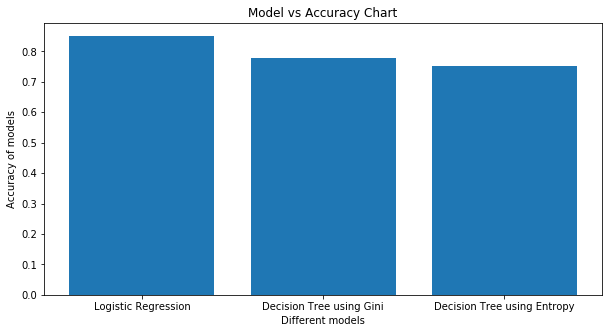

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,5))
plt.bar(list1,list2)
plt.xlabel('Different models')
plt.ylabel('Accuracy of models')
plt.title('Model vs Accuracy Chart')
plt.show()

### On the basis of above analysis, we can say that Logistic Regression performs better on the given dataset.

In [14]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

## Visualising Decision tree

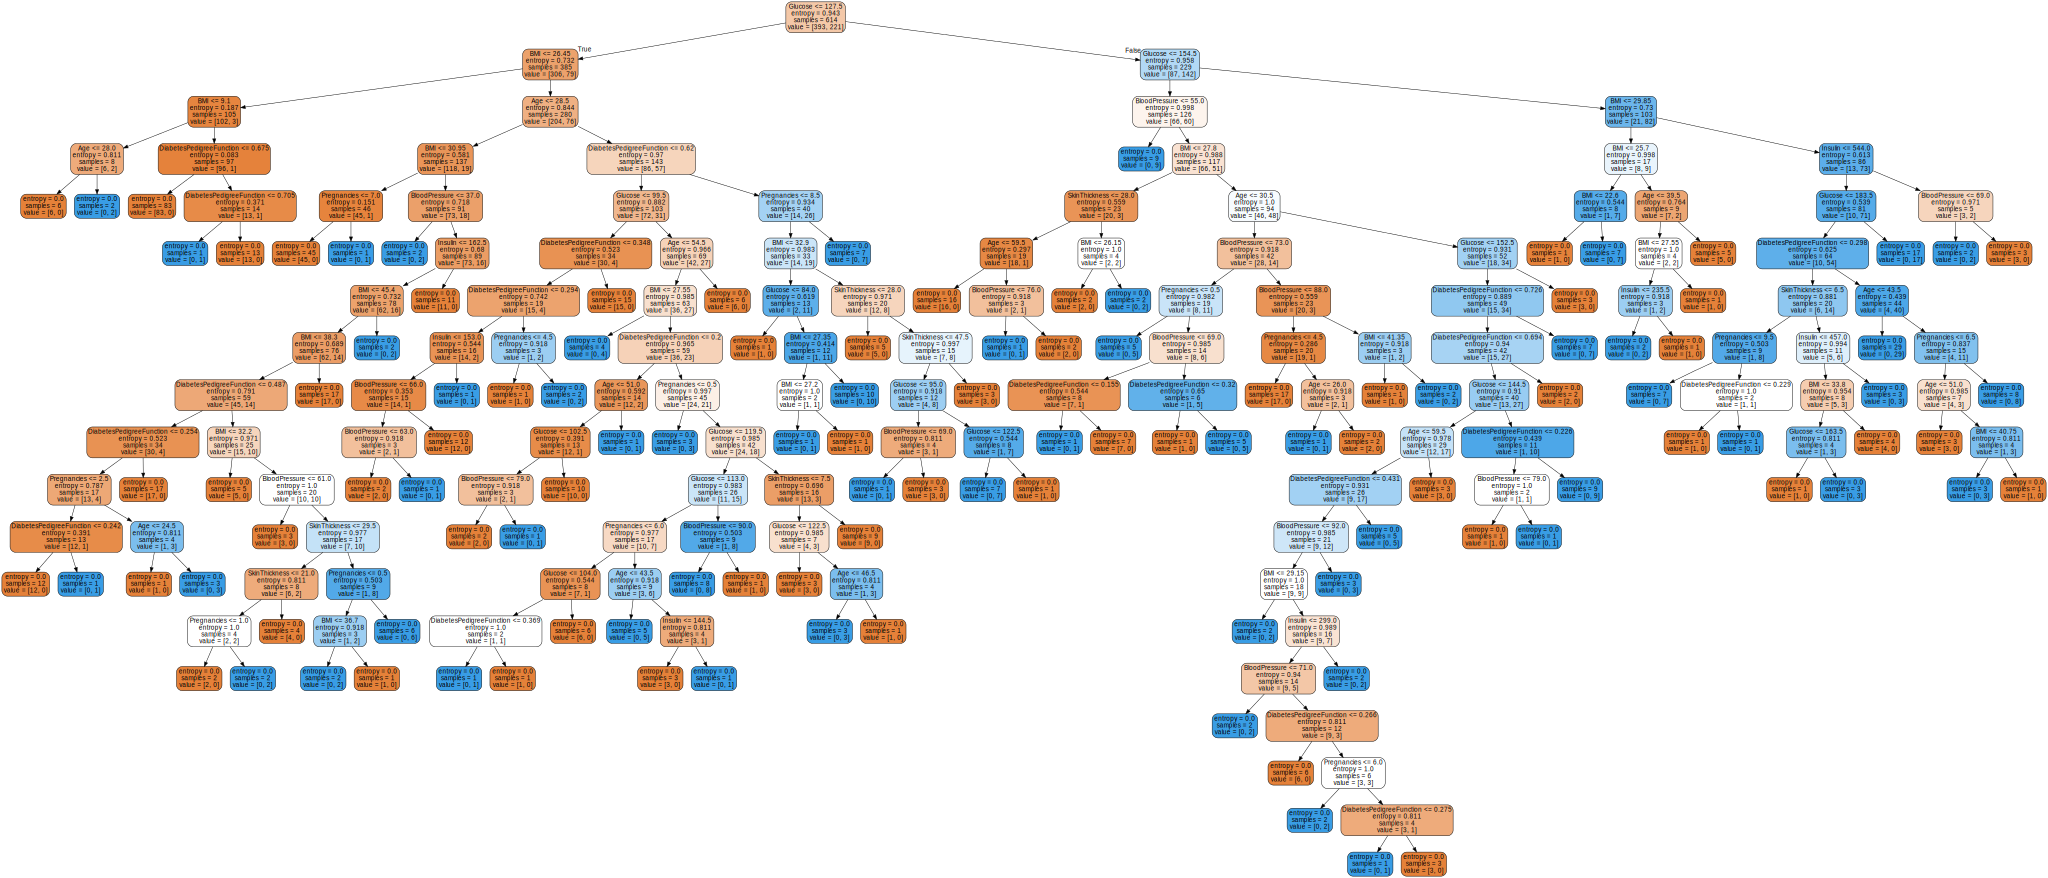

In [15]:
import graphviz 
from sklearn import tree
dot_data = tree.export_graphviz(model, out_file=None, filled=True, rounded=True,
                                #class_names = data.target_names)
                                feature_names=X.columns) 
graph = graphviz.Source(dot_data) 
graph

### Another way of visualising decision tree

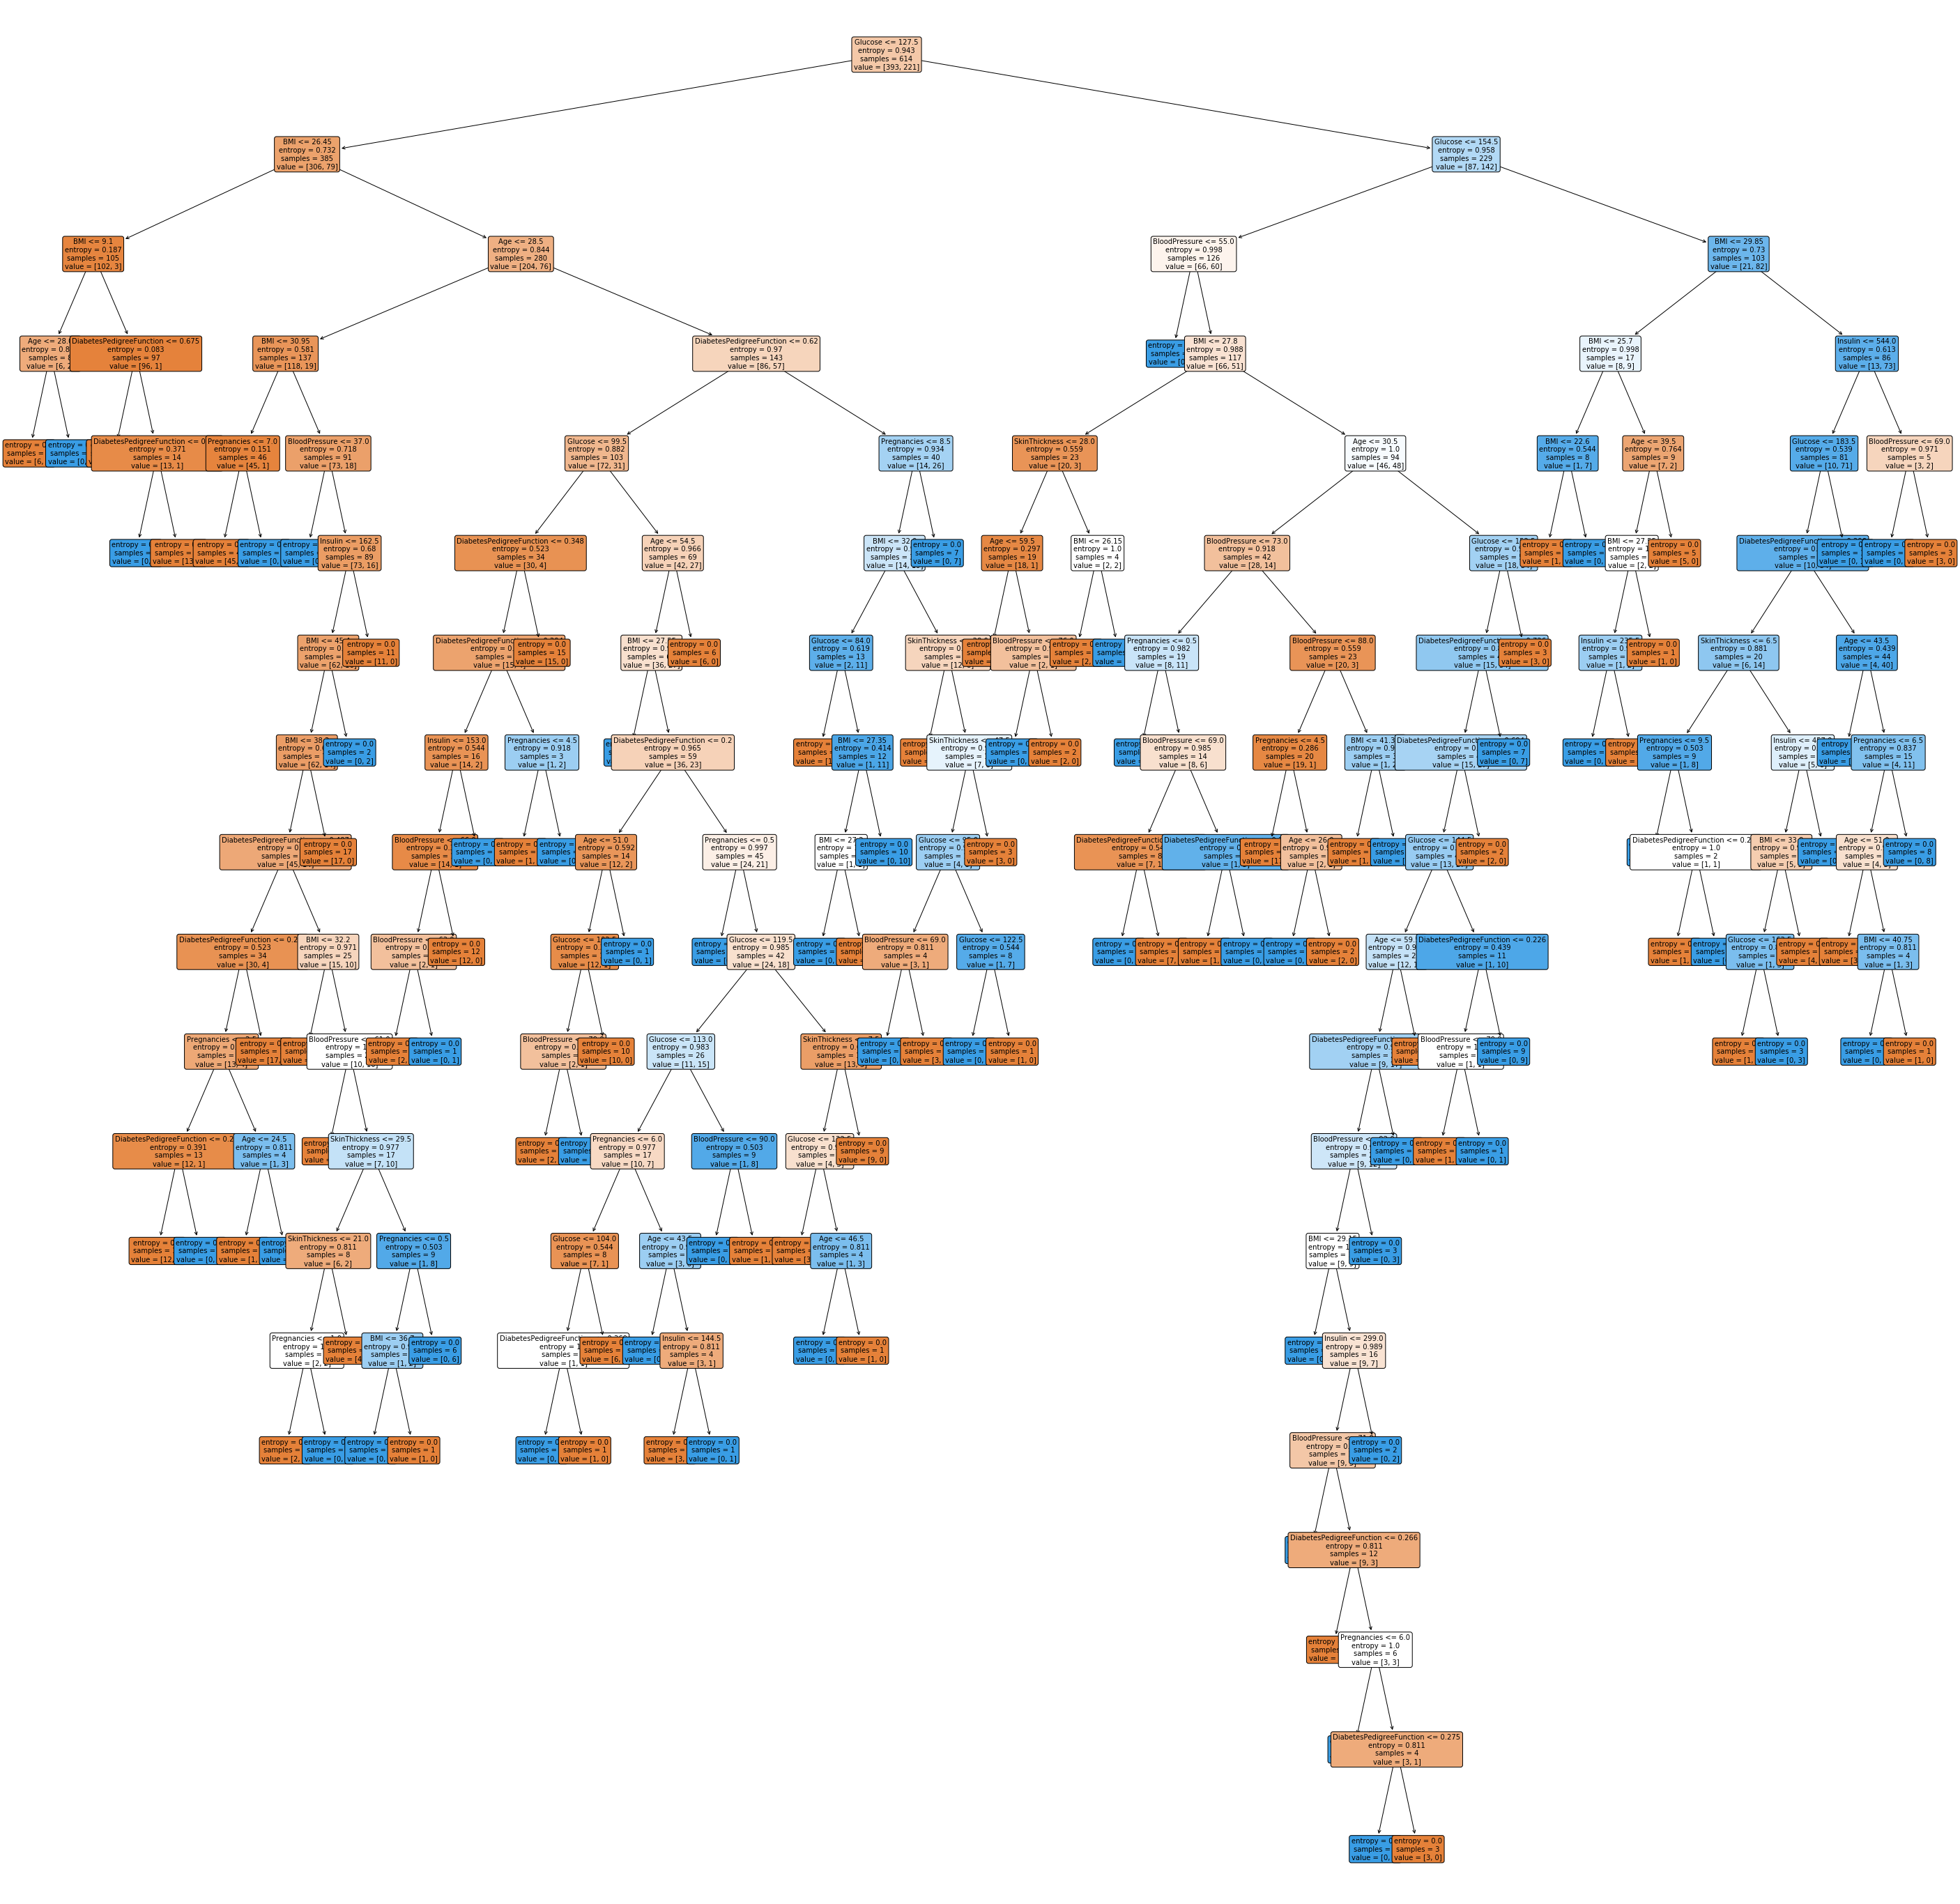

In [16]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(50,50))  
_ = tree.plot_tree(model, feature_names = X.columns, 
             filled=True, fontsize=10, rounded = True)
plt.show()